<a href="https://colab.research.google.com/github/jjn2001/AI_for_drug_discovery/blob/main/Lab1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to cheminformatics using rdkit

---
### In this lesson you'll learn:

- how to read smiles using `rdkit`.
- how to manipulate and visualize molecules.
- how to calculate molecule descriptors.
- how to calculate the similarity of molecules using fingerprints.

---

Today's notebook is about the use of Python in cheminformatics.
As a case study, you will be looking for an alternative to **Sorafenib**. [Sorafenib](https://en.wikipedia.org/wiki/Sorafenib) is a kinase inhibitor used mainly to treat advanced kidney cancer.

As you learned in the lecture, the first hurdle in cheminformatics is to find a suitable format to store molecular structures. To read molecules into Python, the most obvious way is to use *SMILES*. These can be read and manipulated in Python without additional libraries.

For many described structures you can find the structures in different formats on [PubChem](https://pubchem.ncbi.nlm.nih.gov/).
Find the SMILES for sorafenib on PubChem and copy them into the cell below.


<br>

<details>
<summary><strong>If you don't have internet access: click HERE</strong></summary>

```python
    sorafenib = "CNC(=O)C1=NC=CC(=C1)OC2=CC=C(C=C2)NC(=O)NC3=CC(=C(C=C3)Cl)C(F)(F)F"
```
</details>

In [2]:
sorafenib = " " # write the smiles in " " to tell Python that it's a string
print(sorafenib)
type(sorafenib)

str

As you can see, the SMILES are stored as `str` (`string`). We can actually manipulate this `string` and also apply functions.  However, the problem is that while Python understands the SMILES as a `string`, it cannot infer the underlying molecular structure from it. We have no way to obtain information about these molecules.  With `len(sorafenib)` it is possible to determine the length of the `string`, but it is not possible, for example, to determine how many atoms this molecule consists of.

For this you need external libraries. One of the most used chemistry libraries is RDKit.
The most important functions can be loaded with `from rdkit.Chem import AllChem as Chem`. With RDKit you can not only read and display molecules, but also manipulate them and calculate properties.
To interpret a SMILES as a molecule, use `Chem.MolFromSmiles(SMILES)`.

In [3]:
# Installs RDKit
!pip install rdkit==2024.9.4

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.2/34.2 MB 48.2 MB/s eta 0:00:00


In [4]:
from rdkit.Chem import AllChem as Chem
from rdkit.Chem.Draw import IPythonConsole

sorafenib = 'CNC(=O)c1cc(ccn1)Oc2ccc(cc2)NC(=O)Nc3ccc(c(c3)C(F)(F)F)Cl'
sorafenib = Chem.MolFromSmiles(sorafenib)


With the help of RDKit, SMILES can be read and represented as a valid molecule.
The `type(sorafenib)` is now:

In [5]:
type(sorafenib)

rdkit.Chem.rdchem.Mol

The function `Chem.MolFromSmiles` converts the SMILES string into a new variable type, namely the RDKit-Mol. As long as a molecule is stored as `rdkit.Chem.rdchem.Mol` in Python, you can apply all the functions of rdkit to it. You can also use `Chem.MolToSmiles(mol)` to output the molecule as SMILES again:

In [6]:
Chem.MolToSmiles(sorafenib)

'CNC(=O)c1cc(Oc2ccc(NC(=O)Nc3ccc(Cl)c(C(F)(F)F)c3)cc2)ccn1'

The SMILES `string` of sorafenib now looks different from the one you have read in. The difference is in the representation of the aromatic rings. In the original string, double bonds `=` were used explicitly, but now small `c` replace the double bonded large `C`s. RDKit automatically canonicalizes the SMILES according to a certain scheme. PubChem uses a different strategy for canonicalization. You can read SMILES in different forms, but `RDKit` will always output the same form.

If a SMILES is to be read that does not represent a valid molecule, RDKit will output an error.

In [7]:
Chem.MolFromSmiles('CNC(=[O-])c1cc(Oc2ccc(NC(=O)Nc3ccc(Cl)c(C(F)(F)F)c3)cc2)ccn1') # (=[O-]) instead of (=O)

[13:58:45] Explicit valence for atom # 3 O, 2, is greater than permitted


### RDKit
Now that you have sorafenib in the correct format, you can also get information about this molecule:

In [8]:
sorafenib.GetNumAtoms() # How many atoms does sorafenib consist of?

32

There are several functions that can be used to obtain information about molecules. `rdkit` assigns an index to each atom and bond. With this index you can select single atoms or bonds. You can see which atom has which index by changing the `Draw` options as follows:

In [9]:
from rdkit.Chem import Draw
IPythonConsole.drawOptions.addAtomIndices = True
IPythonConsole.drawOptions.addBondIndices = False
IPythonConsole.molSize = (500, 500)

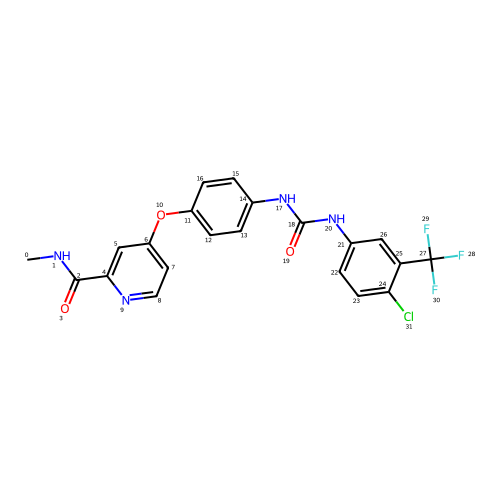

In [10]:
sorafenib

Individual atoms can be selected by their indices with `.GetAtomWithIdx()`. Further functions allow to get more information about the respective atoms:

In [18]:
print("Symbol of atom with index 3")
print(sorafenib.GetAtomWithIdx(3).GetSymbol())

print("\nMass of atom with index 3")
print(sorafenib.GetAtomWithIdx(3).GetMass())

print("\nHybridization of atom with 3")
print(sorafenib.GetAtomWithIdx(3).GetHybridization())


Symbol of atom with index 3
O

Mass of atom with index 3
15.999

Hybridization of atom with 3
SP2


With the function `.SetAtomicNum()` you can also change single atoms and e.g. turn the ketone into an imine.

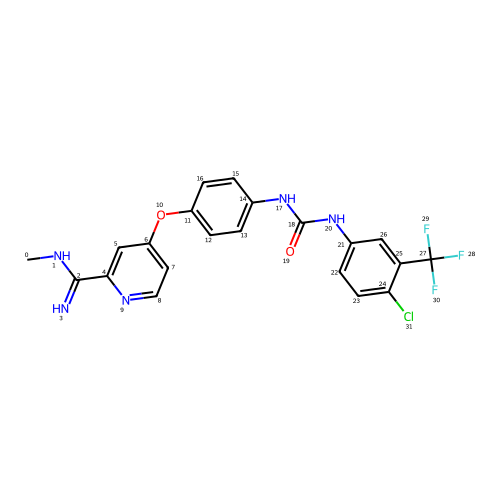

CNC(=N)c1cc(Oc2ccc(NC(=O)Nc3ccc(Cl)c(C(F)(F)F)c3)cc2)ccn1


In [19]:
sorafenib.GetAtomWithIdx(3).SetAtomicNum(7)
display(sorafenib)
print(Chem.MolToSmiles(sorafenib))
sorafenib.GetAtomWithIdx(3).SetAtomicNum(8) # Change is reversed again

Can you replace one of the fluorine atoms with a carbon atom?

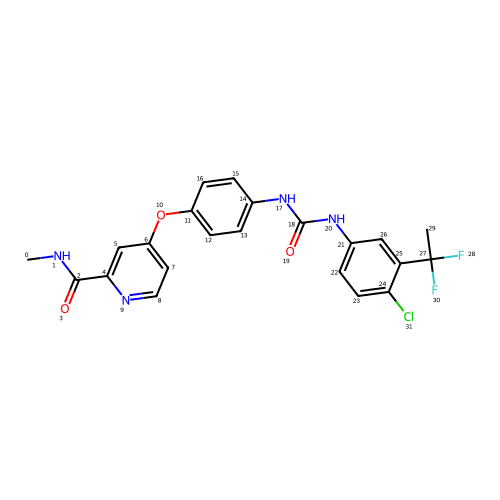

CNC(=O)c1cc(Oc2ccc(NC(=O)Nc3ccc(Cl)c(C(C)(F)F)c3)cc2)ccn1


In [11]:
sorafenib.GetAtomWithIdx(29).SetAtomicNum(6) # write your solution here

display(sorafenib)
print(Chem.MolToSmiles(sorafenib))
sorafenib = Chem.MolFromSmiles("CNC(=O)C1=NC=CC(=C1)OC2=CC=C(C=C2)NC(=O)NC3=CC(=C(C=C3)Cl)C(F)(F)F")


<details>
<summary><strong>Solution:</strong></summary>

```python
    sorafenib.GetAtomWithIdx(31).SetAtomicNum(6)
```
</details>

Similar functions can also be used for bonds. An index is also assigned to each bond.

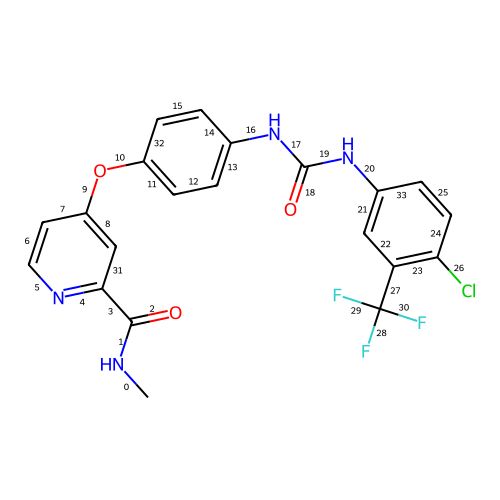

In [12]:
IPythonConsole.drawOptions.addAtomIndices = False # don't show atom indices
IPythonConsole.drawOptions.addBondIndices = True # show bond indices

sorafenib

In [13]:
print("Which type of bond is bond 4")
print(sorafenib.GetBondWithIdx(4).GetBondType())

print("\nIs bond 4 in a ring of size 7")
print(sorafenib.GetBondWithIdx(4).IsInRingSize(7))

print("\nIs bond 4 in a ring of size 6")
print(sorafenib.GetBondWithIdx(4).IsInRingSize(6))

IPythonConsole.drawOptions.addBondIndices = False

Which type of bond is bond 4
AROMATIC

Is bond 4 in a ring of size 7
False

Is bond 4 in a ring of size 6
True


### Descriptors

More helpful than information about individual atoms are descriptors calculated for a whole molecule. With different submodules in `rdkit` you can calculate different properties of molecules:

In [14]:
from rdkit.Chem.Descriptors import MolWt
from rdkit.Chem.Crippen import MolLogP

print("LogP",MolLogP(sorafenib))
print("Molecular Weight",MolWt(sorafenib))

LogP 5.549700000000002
Molecular Weight 464.83100000000013


## Sorafenib Alternatives

The goal is to find alternative molecules for sorafenib. A pre-selection has already been made. The SMILES can be found in the list `smiles`.

In [16]:
smiles = [
    "CNC(=O)c1cc(Oc2ccc(NC(=S)Nc3ccc(Cl)c(C(F)(F)F)c3)cc2)ccn1",
    "C[C@@H](NC(=O)c1cc(Oc2ccc(NC(=O)Nc3ccc(Cl)c(C(F)(F)F)c3)cc2)ccn1)C(=O)NO",
    "CNC(=O)c1cc(Oc2ccc(NC(=S)Nc3cc(C(F)(F)F)cc(C(F)(F)F)c3)cc2)ccn1",
    "N#Cc1cc(Oc2ccc(NC(=O)Nc3ccc(Cl)c(C(F)(F)F)c3)cc2)ccn1",
    "CN(C)c1ccc(NC(=O)c2cc(Oc3ccc(NC(=O)Nc4ccc(Cl)c(C(F)(F)F)c4)cc3)ccn2)cc1",
    "CNC(=O)c1cc(Oc2ccc(NC(=O)Nc3ccc(Br)c(C(F)(F)F)c3)cc2)ccn1",
    "CNC(=O)c1cc(Oc2ccc(NC(=O)Nc3ccc(OC(F)(F)F)cc3)cc2)ccn1",
    "CCNC(=O)c1cc(Oc2ccc(NC(=O)Nc3ccc(Cl)c(C(F)(F)F)c3)cc2)ccn1",
    "CNC(=O)c1cc(Oc2ccc(NC(=O)Nc3cccc(C(F)(F)F)c3)cc2)ccn1"
]

To avoid having to convert each SMILES individually into a `mol` object, write a `for loop`.

You can display multiple molecules side by side with the function `Draw.MolsToGridImage(mols)`.

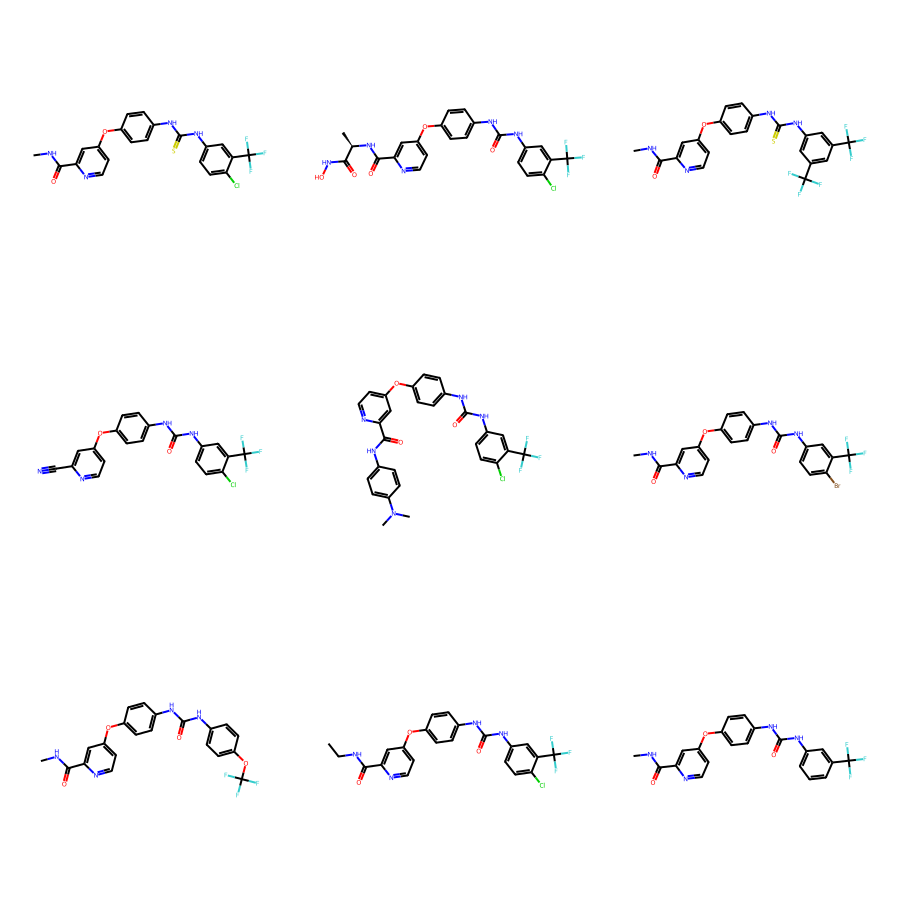

In [17]:
mols = [Chem.MolFromSmiles(x) for x in smiles] # write your solution here
Draw.MolsToGridImage(mols,subImgSize=(300, 300)) #subImgSize allows to show larger images

<details>
<summary><strong>Solution:</strong></summary>

```python
mols = [Chem.MolFromSmiles(x) for x in smiles]
Draw.MolsToGridImage(mols,subImgSize=(300, 300))
```
</details>

To avoid unnecessary costs, you should select only the most promising molecules. For this, you can apply what you have learned so far.
A simple but important rule of thumb for drug development is ["Lipinski's Rule of Five"](https://en.wikipedia.org/wiki/Lipinski%27s_rule_of_five). It states that molecules that have four specific properties are particularly well suited as active ingredients:

#### Lipinski's Rule of Five

>- No more than 5 hydrogen bond donors (mainly nitrogen-hydrogen and oxygen-hydrogen bonds).
>- Not more than 10 hydrogen bond acceptors (mainly oxygen and nitrogen atoms).
>- A molecular weight of less than 500 g/mol.
>- A [logP](https://en.wikipedia.org/wiki/Octanol-water_partition_coefficient) value of less than 5.

You have already calculated the LogP value and the molecular weight with `rdkit` functions.
The submodule `Lipinski` in RDKit offers even more functions among others for the calculation of the number of hydrogen bridge donors and acceptors.

First calculate the number of hydrogen donors (`NumHDonors`)

In [21]:
from rdkit.Chem.Lipinski import NumHAcceptors, NumHDonors

NumDonors = [NumHDonors(x) for x in mols] # input is type chem not type smile to find donors
NumDonors

[3, 5, 3, 2, 3, 3, 3, 3, 3]

<details>
<summary><strong>Solution:</strong></summary>

```python
NumDonors = [NumHDonors(x) for x in mols]
```
</details>

To display the number of donors together with the molecules you can use the function `MolsToGridImage()`. Here you simply have to pass the `NumDonors` to the input variable `legends`. The problem is that the function always expects `Strings`. So no `integers`. Therefore we use another `for-loop` to convert the `int` in `NumDonors` to a `str`.

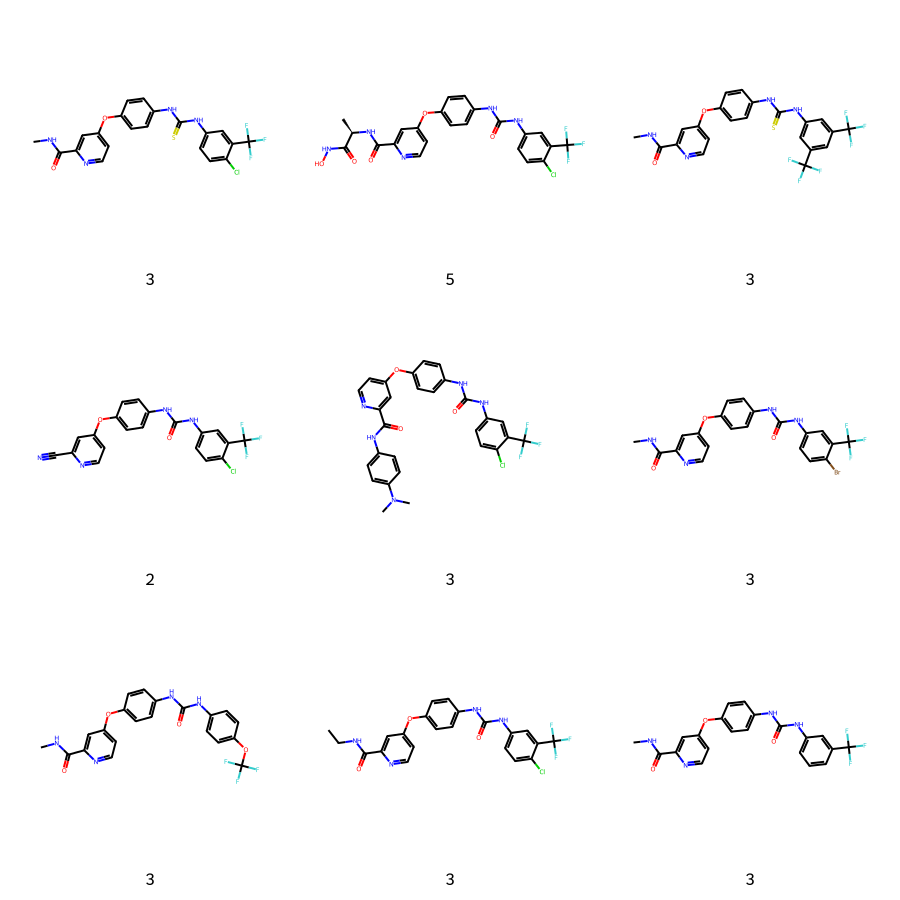

In [22]:
NumDonors = [str(x) for x in NumDonors] # convert donor list to ints
Draw.MolsToGridImage(mols, legends = NumDonors,subImgSize = (300,300))

In the caption you can see the number of hydrogen bond donors. All molecules have fewer donors than the upper limit given by Lipinski. We can repeat the same for the acceptors.
However, this time write the `for-loop` in such a way that the `integers` are immediately converted into `strings`. This way you save a `for-loop`.

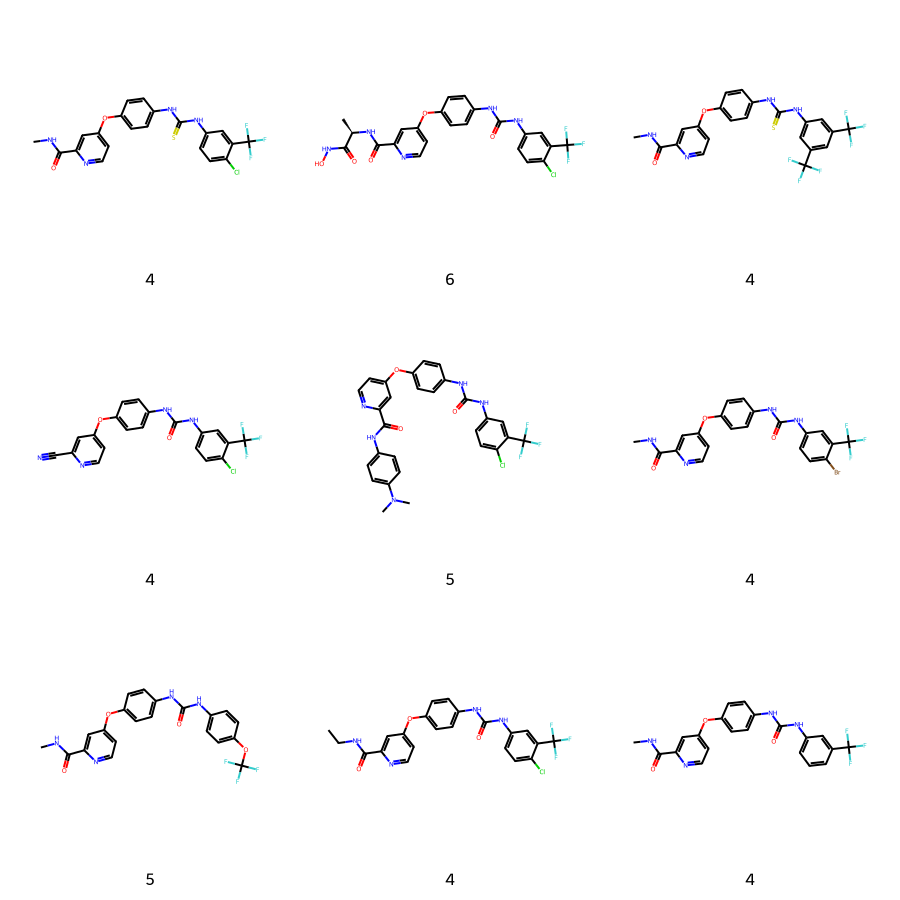

In [23]:
NumAcceptors = [str(NumHAcceptors(x)) for x in mols] # write your solution here
Draw.MolsToGridImage(mols, legends = NumAcceptors, subImgSize= (300,300))

<details>
<summary><strong>Solution:</strong></summary>

```python
NumAcceptors = [str(NumHAcceptors(x)) for x in mols]
Draw.MolsToGridImage(mols, legends = NumAcceptors, subImgSize= (300,300))
```
</details>

Again, none of the molecules violates Lipinski's rule.
Now calculate the molecular weight (`MolWt()`) for the alternatives to sorafenib.

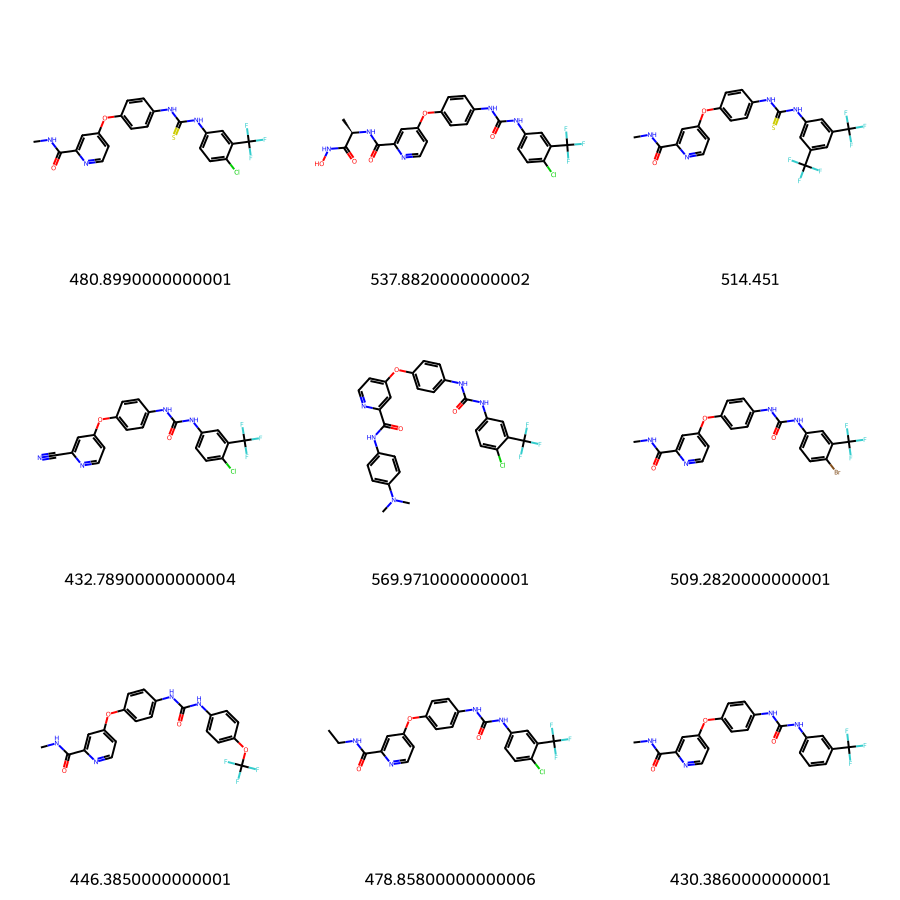

In [24]:
molWeight = [str(MolWt(x)) for x in mols] # write your solution here
Draw.MolsToGridImage(mols, legends = molWeight, subImgSize=(300, 300))

<details>
<summary><strong>Solution:</strong></summary>

```python
molWeight = [str(MolWt(x)) for x in mols]
Draw.MolsToGridImage(mols, legends = molWeight, subImgSize=(300, 300))
```
</details>

Some molecules are actually heavier than "Lipinski's Rule of Five" allows.

The last thing you do is to calculate the LogP (`MolLogP()`).

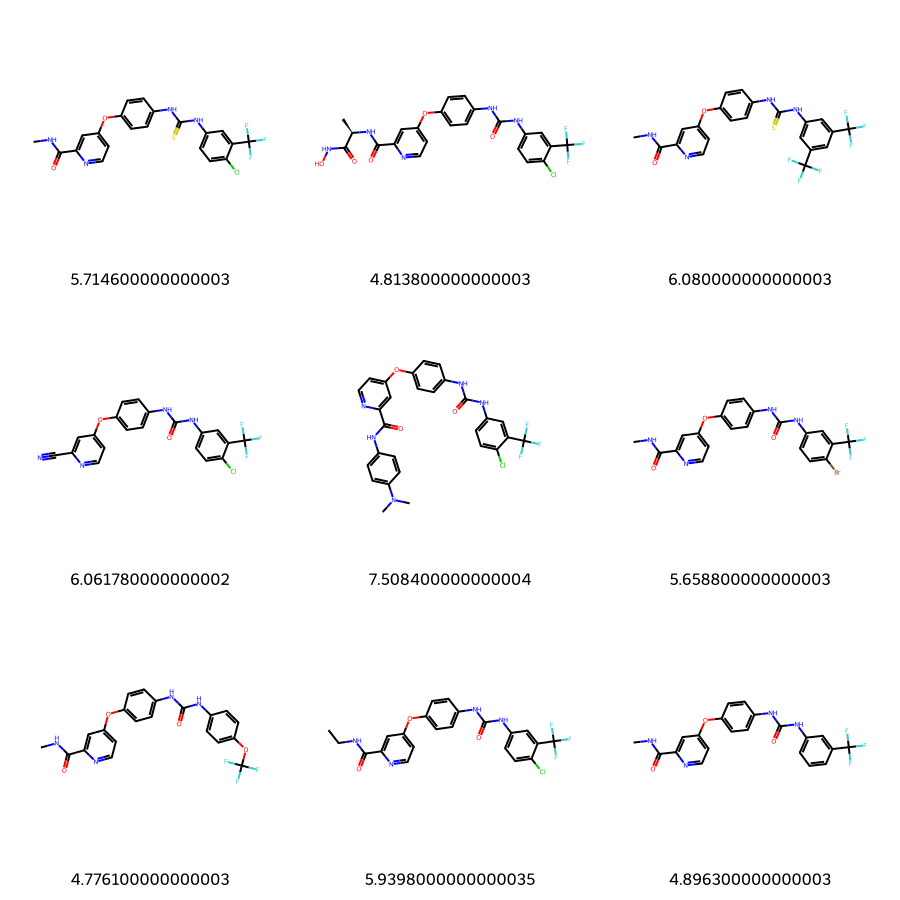

In [26]:
logP = [str(MolLogP(x)) for x in mols] # logp = octanol-water partition coefficient
Draw.MolsToGridImage(mols, legends = logP,subImgSize=(300, 300))

<details>
<summary><strong>Solution:</strong></summary>

```python
logP = [str(MolLogP(x)) for x in mols]
Draw.MolsToGridImage(mols, legends = logP,subImgSize=(300, 300))
```
</details>

In fact, most molecules exceed Lipinski's LogP value. Only three molecules have a value of less than five. These last two molecules are the only ones that meet all four Lipinski rules. Therefore, they may be particularly well suited as drugs. But one should not discard all other molecules just because of a too high LogP value.

Sorafenib itself also has a LogP value of more than 5, so we only remove molecules that have both a too high LogP value and a too high weight. You can use `booleans` to select the correct molecules, e.g. `LogP < 5`. However, previously we saved the values as `str` to output them as legends among the molecules. Therefore, we recalculate the values without converting them to a `str`. In addition, you must also convert the lists into an `array`, otherwise you cannot compare the values.

In [27]:
import numpy as np

logP = [MolLogP(x) for x in mols] # logP is type int here
logP = np.array(logP) # convert list to array
logP < 5.0 # compares each item in array => boolean output

array([False,  True, False, False, False, False,  True, False,  True])

Now do the same for the weight (`MolWt()`).

In [28]:
molWeight = [MolWt(x) for x in mols]
molWeight = np.array(molWeight)
molWeight < 500

array([ True, False, False,  True, False, False,  True,  True,  True])

<details>
<summary><strong>Solution:</strong></summary>

```python
molWeight = [MolWt(x) for x in mols]
molWeight = np.array(molWeight)
molWeight < 500
```
</details>

To select the molecules that have either a weight below 500 or a logP below five, you can use the `|` symbol. The `|` stands for "or". The statement `(logP < 5) | (molWeight<500)` will output `True` for elements that meet at least one of the two conditions. `False` will be output if an element does not satisfy either condition. So it means that either a logP is smaller than five or a weight is smaller than 500 g/mol.

In [29]:
(logP < 5) | (molWeight<500) #OR statement

array([ True,  True, False,  True, False, False,  True,  True,  True])

With this `bool` array we can now select the molecules that remain.

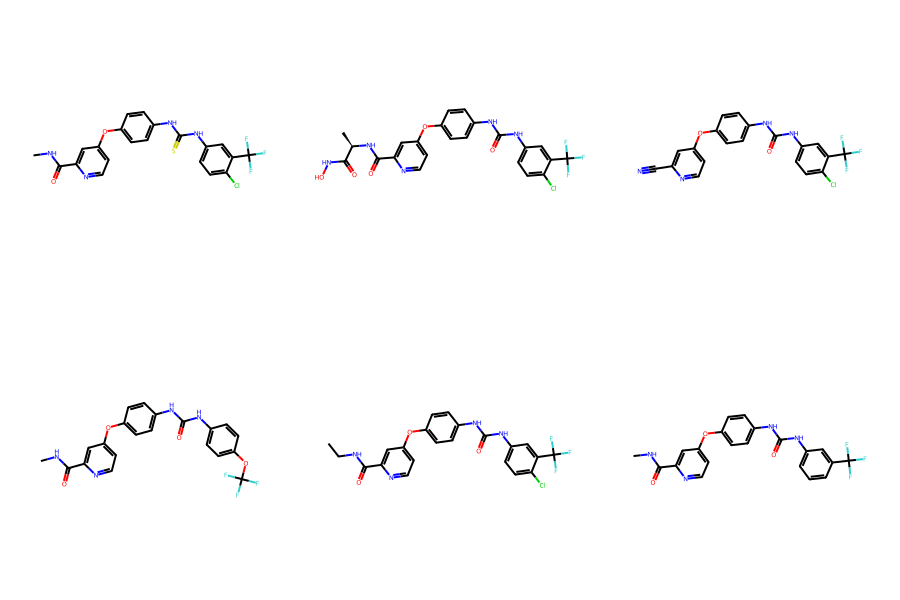

In [30]:
mols=np.array(mols) #convert the mol-list to array
mols_subset=mols[(logP < 5) | (molWeight<500)] # filter list
Draw.MolsToGridImage(mols_subset, subImgSize=(300, 300))

By calculating descriptors, you can reduce the number of candidate molecules. In the next step, you will learn how to further reduce the selection with a similarity search.

## Fingerprints & Similarity Search

RDKit can also compute various *molecular fingerprints*. These include the *Extended Connectivity Fingerprint* (ECFP), originally developed by [Hahn et al.](https://pubs.acs.org/doi/10.1021/ci100050t) 2010.
RDKit has a modified version, which they call *Morgan Fingerprint*.

You can use the function `Chem.GetMorganFingerprint(mol,radius)` to calculate the ECFP. To evaluate the similarity of fingerprints, RDKit also provides a function. For example, `DataStructs.TanimotoSimilarity(fp1,fp2)` can be used to calculate the Tanimoto similarity.

The very similar (but not necessarily identical) molecules have a Tanimoto similarity or `1.0` and very dissimilar molecules have a Tanimoto similarity of `0.0`

In [35]:
from rdkit import DataStructs
fp_sorafenib = Chem.GetMorganFingerprint(sorafenib,radius=2) # depreciation warning - use MorganGenerator
type(fp_sorafenib)

[15:02:48] DEPRECATION WARNING: please use MorganGenerator


rdkit.DataStructs.cDataStructs.UIntSparseIntVect

The Morganfingerprint is not stored as a regular `np.array`. But in the next notebooks you will learn how to get the *normal* vectors of the fingerprints as well.

You have calculated the fingerprint for sorafenib, but to calculate the similarity, you need the fingerprints of the other molecules as well.

*Write a `for-loop` that computes the fingerprint for all the molecules in `mols_subset` and stores them as a list in `fp_mols`.*

In [37]:
# find fingeprints of candidate molecules
fp_mols = [Chem.GetMorganFingerprint( x ,radius = 2) for x in mols_subset]

[15:03:59] DEPRECATION WARNING: please use MorganGenerator
[15:03:59] DEPRECATION WARNING: please use MorganGenerator
[15:03:59] DEPRECATION WARNING: please use MorganGenerator
[15:03:59] DEPRECATION WARNING: please use MorganGenerator
[15:03:59] DEPRECATION WARNING: please use MorganGenerator
[15:03:59] DEPRECATION WARNING: please use MorganGenerator


<details>
<summary><strong>Solution:</strong></summary>

```python
    fp_mols = [Chem.GetMorganFingerprint( x ,radius = 2) for x in mols_subset]
```
</details>
<br>
To calculate the Similarity, use the function described above `TanimotoSimilarity(fp1, fp2)`





In [38]:
# Similarity fn to compare candidate drugs
DataStructs.TanimotoSimilarity(fp_sorafenib,fp_mols[5])

0.7959183673469388

Write a `for-loop` that calculates the similarity to sorafenib for each molecule in `fp_mols`.

In [39]:
sorafenib_similarity = [DataStructs.TanimotoSimilarity(fp_sorafenib , x) for x in fp_mols]
sorafenib_similarity

[0.8736842105263158,
 0.8018867924528302,
 0.7653061224489796,
 0.7378640776699029,
 0.8854166666666666,
 0.7959183673469388]

<details>
<summary><strong>Solution:</strong></summary>

```python
    sorafenib_similarity=[DataStructs.TanimotoSimilarity(fp_sorafenib, x) for x in fp_mols]

```
</details>
<br>


In [ ]:
Draw.MolsToGridImage(mols_subset,legends = [str(x) for x in sorafenib_similarity],subImgSize=(300, 300))

Above you can see the similarity of each molecule to sorafenib. A commonly used rule of thumb is that molecules with a similarity of 0.8 or higher are similar enough to be considered a relevant alternative. In our case, this means that we would only test one molecule. The molecule with a similarity of `0.7959...` would probably still be considered relevant.
Basically, a similarity search is often used to narrow down the space of relevant molecules.

A medicinal chemist could probably pick the most relevant out of nine molecules even without a computer. The real advantage of the computer only becomes clear when you have a pool of several million molecules. The code would work exactly the same way, you would just have to read in the additional SMILES at the beginning of the notebook.


## Practice Exercise: Alternatives for the Norfloxacin Antibiotic

As a somewhat more challenging task, you are now to apply what you have learned so far once again on your own.
Basically, the task is very similar to the previous ones, but you will get less help.
First, find the SMILES `string` for norfloxacin at [PubChem](https://pubchem.ncbi.nlm.nih.gov/). Then convert the string to `mol` format and display the molecule.

> "Norfloxacin is a synthetic broad-spectrum antibiotic from the gyrase inhibitor group for oral administration."

Source: [Wikipedia](https://en.wikipedia.org/wiki/Norfloxacin)


In [ ]:
# If you do this task at a later time, you can use this cell
# to import the required libraries at once
from rdkit.Chem import AllChem as Chem
from rdkit.Chem import Draw
from rdkit.Chem.Descriptors import MolWt
from rdkit.Chem.Crippen import MolLogP
from rdkit.Chem.Lipinski import NumHAcceptors, NumHDonors
from rdkit import DataStructs

In [ ]:
norfloxacin = "CCN1C=C(C(=O)C2=CC(=C(C=C21)N3CCNCC3)F)C(=O)O"
# convert the string to mol
norfloxacin =
# display the molecule
norfloxacin

Next, calculate the descriptors for norfloxacin that are important for *Lipinski's Rule of Five*.

In [ ]:
# Calculate Sie MW
MW_norfloxacin =

# Calculate the number of H-bond acceptors
NumHAcceptors_norfloxacin =

# Calculate the number of H-bond donors
NumHDonors_norfloxacin =

# Calculate logP
logP_norfloxacin =

The next cell outputs the calculated descriptors:

In [ ]:
print("MW:", MW_norfloxacin)
print("NumHAcceptors", NumHAcceptors_norfloxacin)
print("NumHDonors", NumHDonors_norfloxacin)
print("LogP",logP_norfloxacin)

A pre-selection of possible norfloxacin alternatives is listed in the next cell. Convert the SMILES to `mol` format and then calculate the descriptors. The easiest way to do this is with the notation `List = [function(x) for x in OtherList]` used several times above.

In [ ]:
# Don't forget to run this cell.
quinolones = ["C1CC1N2C=C(C(=O)C3=CC(=C(C=C32)N4CCNCC4)F)C(=O)O",
             "CN1CCN(CC1)C2=C(C=C3C(=C2F)N(C=C(C3=O)C(=O)O)CCF)F",
             "CCN1C=C(C(=O)C2=CC(=C(C(=C21)F)N3CCNC(C3)C)F)C(=O)O",
             "CC1CCC2=C3N1C=C(C(=O)C3=CC(=C2N4CCC(CC4)O)F)C(=O)O",
             "CC1COC2=C3N1C=C(C(=O)C3=CC(=C2N4CCN(CC4)C)F)C(=O)O"
             "CCN1C=C(C(=O)C2=CC(=C(C=C21)N3CCN(CC3)C)F)C(=O)O",
             "CN1CCN(CC1)C2=C(C=C3C4=C2SCCN4C=C(C3=O)C(=O)O)F",
             "CCN1C=C(C(=O)C2=CC(=C(N=C21)N3CCNCC3)F)C(=O)O",
             "CNC1CCCN(C1)C2=C(C=C3C(=C2OC)N(C=C(C3=O)C(=O)O)C4CC4)F",
             "CC1CN(CCN1)C2=C(C(=C3C(=C2)N(C=C(C3=O)C(=O)O)C4CC4)C)F",
             "C[C@H]1COC2=C3N1C=C(C(=O)C3=CC(=C2N4CCN(CC4)C)F)C(=O)O",
             "C[C@H]1COC2=C3N1C=C(C(=O)C3=CC(=C2C4(CC4)N)F)C(=O)O",
             "C[C@@H]1CN(C[C@@H](N1)C)C2=C(C(=C3C(=C2F)N(C=C(C3=O)C(=O)O)C4CC4)N)F",
             "CC1CN(CCN1)C2=C(C=C3C(=C2)N(C=C(C3=O)C(=O)O)C4=C(C=C(C=C4)F)F)F",
             "C1CN(CC1N)C2=C(C=C3C(=O)C(=CN(C3=N2)C4=C(C=C(C=C4)F)F)C(=O)O)F"]

In [ ]:
# Convert the strings to mol
quinolones =

In [ ]:
# Calculate the four descriptors for all molecules in the list
MW_quinolones =
NumHAcceptors_quinolones =
NumHDonors_quinolones =
logP_quinolones =

In the following cell you can display the molecules with the calculated descriptors. You do not necessarily have to be able to follow the code.

You have to read the values yourself. (`Ctrl` + mouse wheel to zoom.)

In [ ]:
legend = []
for i in range(len(MW_quinolones)):
    legend.append("MW: "+str(round(MW_quinolones[i]))+"\n"+
                 "NumHAcceptors: "+str(NumHAcceptors_quinolones[i])+"\n"+
                 "NumHDonors: "+str(NumHDonors_quinolones[i])+"\n"+
                 "logP: "+str(round(logP_quinolones[i], 4)))

Draw.MolsToGridImage(quinolones, molsPerRow=3, legends = legend,
                    subImgSize=(250,150), useSVG=True)

Since virtually all molecules follow *Lipinski's Rule of Five*, we refrain from removing molecules from our database at this point and instead calculate similarity to norfloxacin directly. This requires first calculating the fingerprints and then the Tanimoto similarity.

In [ ]:
# First calculate the fingerprints of the quinolones and norfloxacin.
norfloxacin_fp =
quinolones_fp =

Now calculate the similarities of `quinolones` with norfloxacin.

In the cell below you can display the similarities.

In [ ]:
quinolones_similarity =

In [ ]:
Draw.MolsToGridImage(quinolones, legends = [str(round(x, 2)) for x in quinolones_similarity],
                    subImgSize=(250,200), useSVG=True)

As you can see, most of the molecules are not particularly similar to norfloxacin (at least according to Tanimoto Similarity). However, each of the molecules are actually broad-spectrum antibiotics that were available, at least in the past. Therefore, one cannot rely solely on the similarity between the molecules to infer activity.